In this notebook, I analyze the control mid block, as that's were the first errors occur

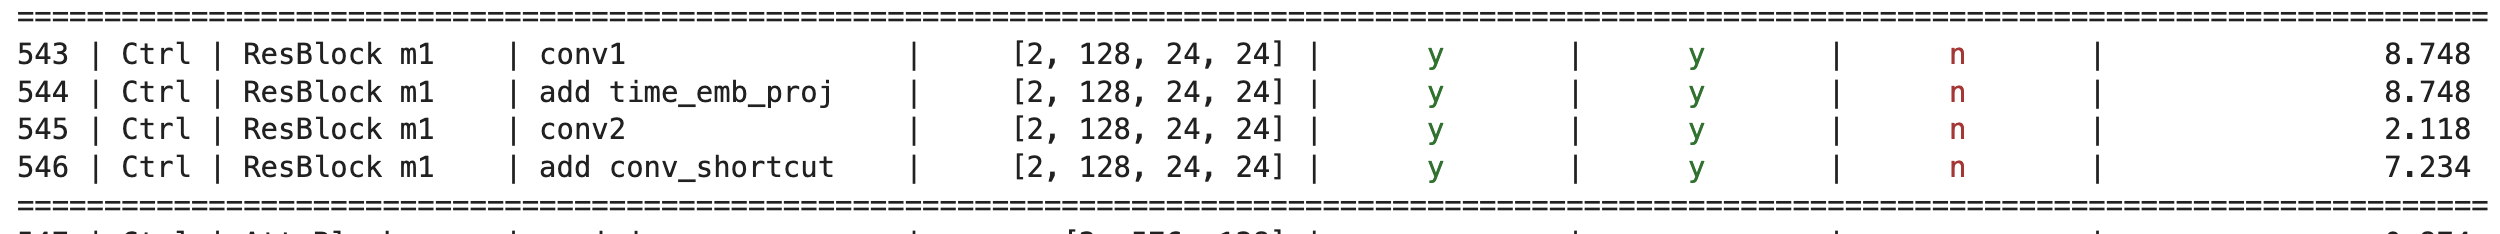

___

In [1]:
import os
os.environ['CUBLAS_WORKSPACE_CONFIG'] = ':4096:8'  # needed to make torch deterministic

In [2]:
import scripts.control_utils as cu
import torch
torch.set_printoptions(linewidth=200)

/opt/conda/lib/python3.10/site-packages/timm/models/_factory.py:114: UserWarning: Mapping deprecated model name vit_base_resnet50_384 to current vit_base_r50_s16_384.orig_in21k_ft_in1k.
  model = create_fn(


In [3]:
torch.use_deterministic_algorithms(True)

In [4]:
path_to_config = 'cnxs_config/sdxl/sdxl_encD_canny_48m.yaml'

If this results in the kernel crashing, I'm using too much GPU memory elsewhere. Shut down every other kernel and try again.

In [5]:
model = cu.create_model(path_to_config).to('cuda')

Building a Downsample layer with 2 dims.
  --> settings are: 
 in-chn: 320, out-chn: 320, kernel-size: 3, stride: 2, padding: 1
constructing SpatialTransformer of depth 2 w/ 640 channels and 10 heads
constructing SpatialTransformer of depth 2 w/ 640 channels and 10 heads
Building a Downsample layer with 2 dims.
  --> settings are: 
 in-chn: 640, out-chn: 640, kernel-size: 3, stride: 2, padding: 1
constructing SpatialTransformer of depth 10 w/ 1280 channels and 20 heads
constructing SpatialTransformer of depth 10 w/ 1280 channels and 20 heads
constructing SpatialTransformer of depth 10 w/ 1280 channels and 20 heads
constructing SpatialTransformer of depth 10 w/ 1280 channels and 20 heads
constructing SpatialTransformer of depth 10 w/ 1280 channels and 20 heads
constructing SpatialTransformer of depth 10 w/ 1280 channels and 20 heads
constructing SpatialTransformer of depth 2 w/ 640 channels and 10 heads
constructing SpatialTransformer of depth 2 w/ 640 channels and 10 heads
constructing

In [10]:
mid_res = model.model.control_model.middle_block[0]
mid_res

ResBlock(
  (in_layers): Sequential(
    (0): GroupNorm_leq32(32, 1408, eps=1e-05, affine=True)
    (1): SiLU()
    (2): Conv2d(1408, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (h_upd): Identity()
  (x_upd): Identity()
  (emb_layers): Sequential(
    (0): SiLU()
    (1): Linear(in_features=1280, out_features=128, bias=True)
  )
  (out_layers): Sequential(
    (0): GroupNorm_leq32(32, 128, eps=1e-05, affine=True)
    (1): SiLU()
    (2): Dropout(p=0, inplace=False)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (skip_connection): Conv2d(1408, 128, kernel_size=(1, 1), stride=(1, 1))
)

In [13]:
mid_res.in_layers[2].weight.data.flatten()[:5]

tensor([0.0153, 0.0219, 0.0147, 0.0010, 0.0082], device='cuda:0')

In [14]:
from types import SimpleNamespace
import pickle

params = SimpleNamespace(
    w=mid_res.in_layers[2].weight.data.cpu().detach(),
    b=mid_res.in_layers[2].bias.data.cpu().detach(),
)
with open('ctrl_mid_res1_conv1_params.pkl', 'wb') as f: pickle.dump(params, f)

In [15]:
2+2

4